In [12]:
# Connect to Google Drive so I can use the eda_data.csv file I uploaded there
from google.colab import drive
drive.mount('/content/drive')

# Set path to my dataset (I saved it under MyDrive)
path = "/content/drive/MyDrive/eda_data.csv"

# Load dataset
import pandas as pd
eda_data = pd.read_csv(path)

# Quick look at the first few rows
eda_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [13]:
import re

# Drop unnecessary columns (e.g., 'Unnamed: 0' or columns not needed for analysis)
eda_data_cleaned = eda_data.drop(columns=['Unnamed: 0'])

# Clean the 'Salary Estimate' column and extract salary range into avg_salary
# Removing text, splitting ranges, and calculating the average salary
eda_data_cleaned = eda_data_cleaned[eda_data_cleaned['Salary Estimate'] != '-1']  # Remove rows with no salary estimate

# Extract salary range
eda_data_cleaned['Salary Estimate'] = eda_data_cleaned['Salary Estimate'].apply(lambda x: x.split('(')[0])

# Remove non-numeric characters and convert the salary estimates to numeric ranges
eda_data_cleaned['Salary Estimate'] = eda_data_cleaned['Salary Estimate'].apply(lambda x: re.sub('[^0-9K\-]', '', x))

# Split the salary range and calculate the average
eda_data_cleaned['min_salary'] = eda_data_cleaned['Salary Estimate'].apply(lambda x: int(x.split('-')[0].replace('K', '')) * 1000 if '-' in x else 0)
eda_data_cleaned['max_salary'] = eda_data_cleaned['Salary Estimate'].apply(lambda x: int(x.split('-')[1].replace('K', '')) * 1000 if '-' in x else 0)
eda_data_cleaned['avg_salary'] = (eda_data_cleaned['min_salary'] + eda_data_cleaned['max_salary']) / 2

# Drop the original 'Salary Estimate' column after extracting necessary data
eda_data_cleaned = eda_data_cleaned.drop(columns=['Salary Estimate'])

# Remove unnecessary spaces from 'Company Name'
eda_data_cleaned['company_txt'] = eda_data_cleaned['Company Name'].apply(lambda x: x.strip())

# Check for missing values and drop any rows with missing critical data
eda_data_cleaned = eda_data_cleaned.dropna(subset=['Job Title', 'avg_salary'])

# Save the cleaned data to a new CSV file
eda_data_cleaned.to_csv('salary_data_cleaned.csv', index=False)

# View the cleaned dataset
print(eda_data_cleaned.head())


<>:14: SyntaxWarning: invalid escape sequence '\-'
<>:14: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipython-input-3121508183.py:14: SyntaxWarning: invalid escape sequence '\-'
  eda_data_cleaned['Salary Estimate'] = eda_data_cleaned['Salary Estimate'].apply(lambda x: re.sub('[^0-9K\-]', '', x))


                   Job Title  \
0             Data Scientist   
1  Healthcare Data Scientist   
2             Data Scientist   
3             Data Scientist   
4             Data Scientist   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters        

In [27]:
# Load cleaned data
data = pd.read_csv('salary_data_cleaned.csv')

print(data.head())
print(data.columns)

                   Job Title  \
0             Data Scientist   
1  Healthcare Data Scientist   
2             Data Scientist   
3             Data Scientist   
4             Data Scientist   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters        

Sample Plot

In [16]:
data = data[data['avg_salary'].notna()]  # Remove rows with NaN in the avg_salary column


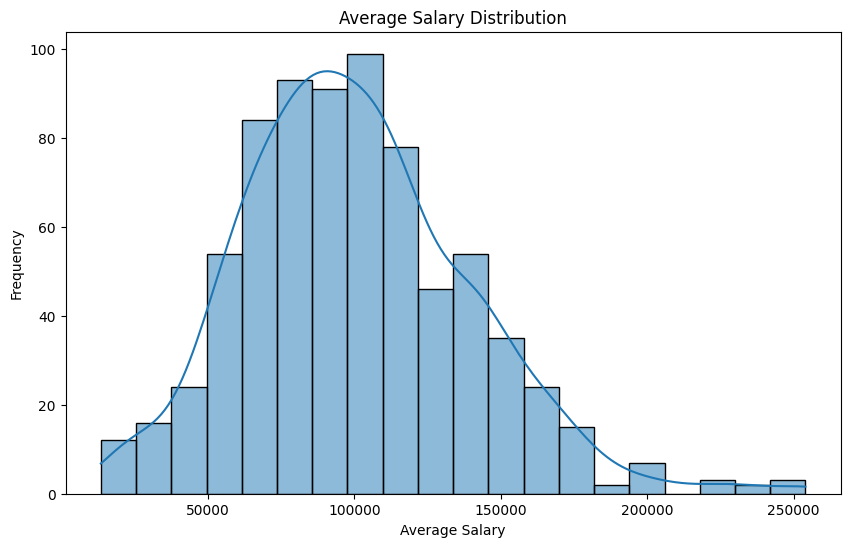

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Average Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_salary'], bins=20, kde=True)  # Used average salary column
plt.title('Average Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


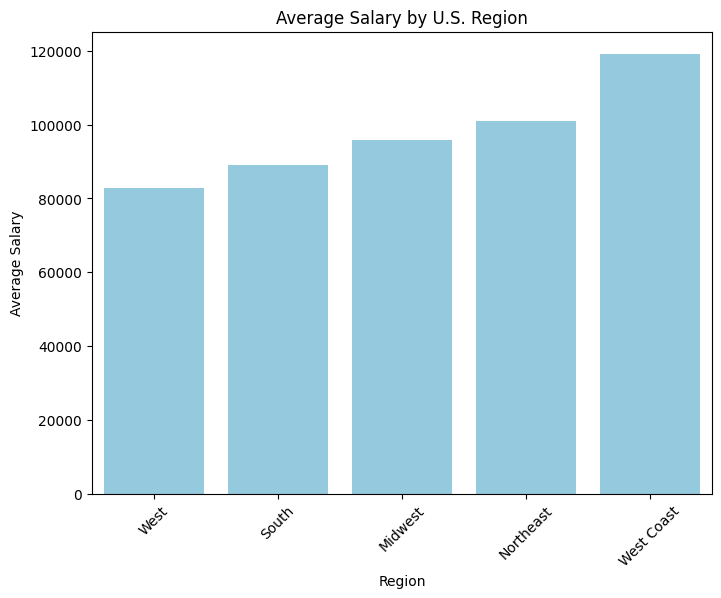

In [26]:
# Bar chart for average salary by location

# Dictionary mapping US states to regions
region_map = {
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast','CT':'Northeast',
    'NY':'Northeast','NJ':'Northeast','PA':'Northeast',

    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest','MN':'Midwest','IA':'Midwest',
    'MO':'Midwest','ND':'Midwest','SD':'Midwest','NE':'Midwest','KS':'Midwest',

    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South','KY':'South','NC':'South','SC':'South',
    'GA':'South','FL':'South','AL':'South','MS':'South','TN':'South','AR':'South','LA':'South','OK':'South',
    'TX':'South',

    'MT':'West','ID':'West','WY':'West','CO':'West','NM':'West','AZ':'West','UT':'West','NV':'West',

    'WA':'West Coast','OR':'West Coast','CA':'West Coast','AK':'West Coast','HI':'West Coast'
}

# Making sure Location exists
data['state'] = data['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notna(x) else None)

# Mapping each state to a region
data['region'] = data['state'].map(region_map)

# Average salary by region
avg_salary_region = data.groupby('region')['avg_salary'].mean().sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=avg_salary_region.index, y=avg_salary_region.values, color="skyblue")
plt.title('Average Salary by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()